#  Clustering 2

In [3]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Пример: набор данных MNIST

Набор данных рукописных цифр MNIST состоит из изображений рукописных цифр вместе с метками, указывающими, какая цифра находится на каждом изображении.

Поскольку в этом наборе данных присутствуют как объекты, так и метки (а метки для больших наборов данных обычно трудно/дорого получить), этот набор данных часто используется в качестве эталона для сравнения различных методов.
Например, [эта веб-страница](http://yann.lecun.com/exdb/mnist/) описывает множество различных результатов классификации в MNIST (обратите внимание, тесты на этом веб-сайте предназначены для набора данных большего размера и с более высоким разрешением, чем мы воспользуюсь.) Чтобы увидеть сравнение методов классификации, реализованных в scikit-learn в наборе данных MNIST, см.
[эта страница](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
Набор данных MNIST также часто используется для сравнительного анализа алгоритмов кластеризации, и поскольку он имеет метки, мы можем оценить однородность или чистоту кластеров.

Существует несколько версий набора данных. Мы будем использовать тот, который встроен в scikit-learn и описан [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

* Классы: 10
* Образцы на класс: $\approx$180.
* Всего образцов: 1797
* Размерность: 64 (8 пикселей на 8 пикселей)
* Возможности: целые числа 0–16.

Вот несколько примеров изображений. Обратите внимание, что цифры нормализованы по размеру и центрированы в изображении фиксированного размера ($8\times8$ пикселей).

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples: 1797, n_features: 64


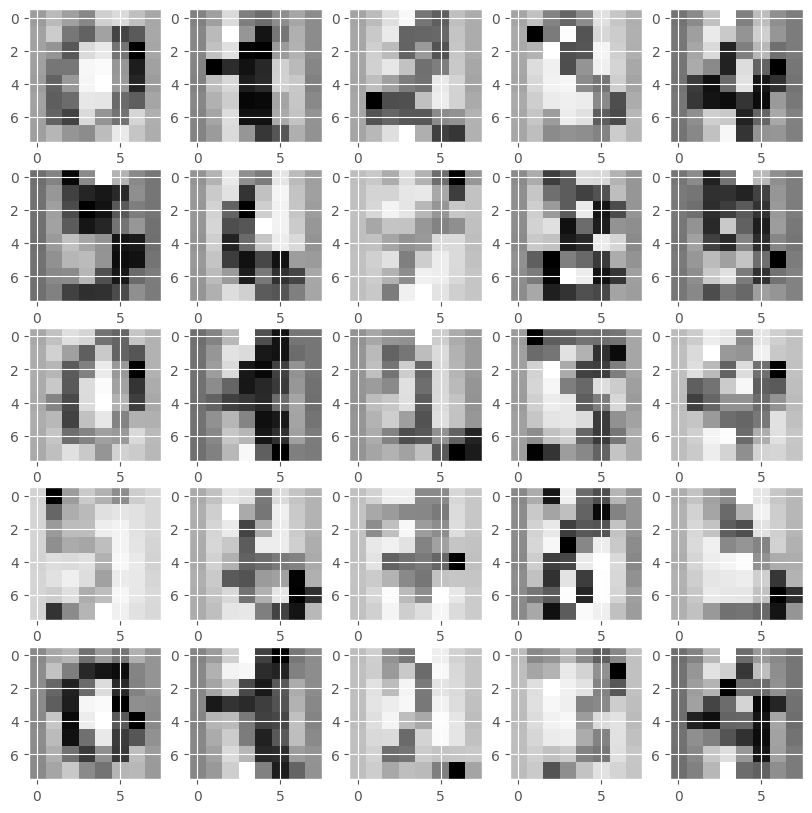

In [4]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples: %d, n_features: %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
Сначала мы используем метод k-средних для кластеризации набора данных и вычисления показателя однородности для кластеризации.

In [5]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.605206311579634

#### Упражнение: Иерархическая кластеризация
Используйте метод иерархической кластеризации для кластеризации набора данных. Снова вычислите однородность.

*Подсказка:* Используйте функцию scikit-learn *AgglomerativeClustering*.

Существует две основные стратегии иерархической кластеризации:

- Агломерация.
- Разделение.

В данной лабораторной работе будет рассмотрена агломерационная кластеризация.

Поскольку агломеративная кластеризация - это подход, основанный на расстоянии, требуется стандартизация функций:

In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)

Также для предобработки необходимо уменьшить размерность с помощью t-SNE для визуализации в двух измерениях.

*T-SNE (tsne) - это алгоритм уменьшения размерности, который хорошо подходит для визуализации многомерных данных.

In [7]:
from sklearn.manifold import TSNE
X2 = TSNE(n_components=2, random_state = 0).fit_transform(X)

Построим дендрограмму - древовидный график, который визуализирует процесс объединения кластеров при агломеративной кластеризации. Высота разветвления указывает на степень сходства или различия: более высокая точка разветвления предполагает большую разницу между кластерами.

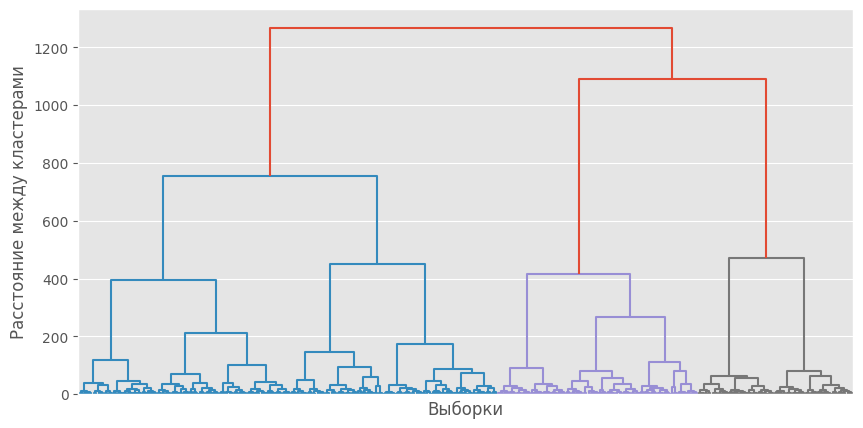

In [8]:
dend = hierarchy.linkage(X2, method="ward")

plt.figure(figsize=(10, 5))
res = hierarchy.dendrogram(dend)

plt.xticks([])
plt.xlabel("Выборки")
plt.ylabel("Расстояние между кластерами")
plt.grid(True)

Теперь можно перейти к подбору и построению модели, используя агломерацию.

Также вычислим однородность.

При построении модели используется метод Уорда.

Метод Уорда направлен на минимизацию дисперсии внутри объединенных кластеров, измеряя расстояние между двумя кластерами

In [9]:
from sklearn.cluster import AgglomerativeClustering

#создание объекта кластеризации
cl_model = AgglomerativeClustering(n_clusters=10, linkage="ward")

#применяем иерархическую кластеризацию
clusters = cl_model.fit_predict(X2)

#вычисление однородности
homogeneity = homogeneity_score(y, clusters)
print("Однородность:", homogeneity)

Однородность: 0.8410974422950411


Иерархическая кластеризация имеет довольно высокую однородность. Кластеризация не идеальна, но она будет весьма полезна для выявления некоторых структур в данных.

#### Упражнение: DBScan

Используйте DBScan для кластеризации набора данных. Проблема, с которой вы столкнетесь, — это выбор $\epsilon$. Вы можете использовать функцию DistanceMetric, чтобы получить представление о типичных расстояниях между точками.

In [10]:
import pandas as pd
from sklearn.metrics import DistanceMetric

digits = load_digits()
Xd = scale(digits.data)
Yd = digits.target

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(Xd)

df = pd.DataFrame(distances)
# df.describe()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,10.988066,10.525329,9.420509,9.476049,8.446494,9.319143,11.183783,8.265943,8.090609,...,7.602724,9.688938,9.915820,9.487418,9.737403,6.708546,4.948633,9.299451,6.849003,9.497592
1,10.988066,0.000000,8.253972,8.515567,9.073580,9.029654,7.168774,10.487432,8.960616,9.828694,...,9.227186,10.067877,8.625497,6.344748,9.716562,9.383636,10.761498,7.078731,8.715783,10.227956
2,10.525329,8.253972,0.000000,10.562977,9.845128,10.887676,8.560835,10.790463,8.596297,10.769770,...,11.140368,9.302450,9.698517,8.089599,9.199140,10.039752,10.158742,7.743502,9.928229,8.988234
3,9.420509,8.515567,10.562977,0.000000,9.842043,6.976749,8.552772,11.447700,7.724663,8.283758,...,7.166330,11.464986,9.693065,8.320818,11.927149,7.662449,10.458382,9.098292,8.514493,8.677809
4,9.476049,9.073580,9.845128,9.842043,0.000000,10.237614,7.567513,11.729796,9.997688,10.525660,...,9.246379,5.608847,11.214144,9.319117,6.731420,9.700191,9.827718,8.941622,9.702047,10.733641


1) Воспользуемся материалами лекции и осуществим построение модели с помощью DBSCAN

Методом перебора eps=4 показала лучшие результаты по характеристикам кластеризации. Так, значение V-меры остается на довольно низком уровне, однако не является хорошим, поэтому модель требуется в основательной доработке.

In [11]:
db_model = DBSCAN(eps=4.0, min_samples=2)
db_model.fit(Xd)
db_pred = db_model.fit_predict(Xd)

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Предполагаемое количество кластеров: %d' % n_clusters_)
print('Примерное количество точек шума: %d' % n_noise_)
print("Однородность: %0.3f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.3f" % metrics.completeness_score(y, labels))
print("V-мера: %0.3f" % metrics.v_measure_score(y, labels))

Предполагаемое количество кластеров: 87
Примерное количество точек шума: 480
Однородность: 0.638
Полнота: 0.560
V-мера: 0.596


2) Вычислим среднее расстояние между точками с помощью экземпляра класса DistanceMetric из первой ячейки, чтобы получить представление о типичных расстояниях между точками из условий задания:

In [12]:
distances_mean = np.mean(distances)
print("Среднее расстояние между точками:", distances_mean)

Среднее расстояние между точками: 10.386146078858067


Применим DBScan для кластеризации данных в наборе load_digits с выбранным значением eps и оценим результаты с помощью метрик качества кластеризации:



In [13]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neigh = NearestNeighbors(n_neighbors=2)
neigh_fit = neigh.fit(df)
distances, indices = neigh_fit.kneighbors(df)

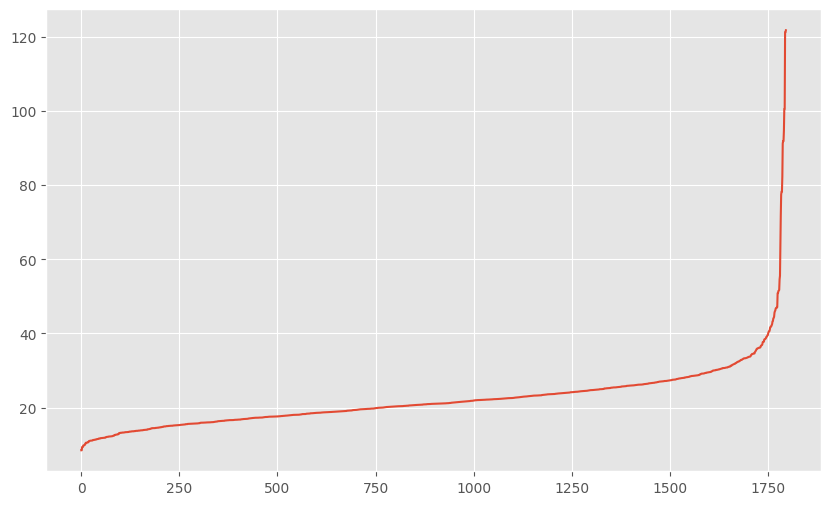

In [14]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [15]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=4, min_samples=2)
db_model.fit(Xd)
y_pred = db_model.fit_predict(Xd)

print("Однородность: %0.3f" % metrics.homogeneity_score(y, y_pred))
print("Полнота: %0.3f" % metrics.completeness_score(y, y_pred))
print("V-мера: %0.3f" % metrics.v_measure_score(y, y_pred))

Однородность: 0.638
Полнота: 0.560
V-мера: 0.596


Так, путем перебора значения эпсилон, получились аналогичные значения метрик, как в первом случае. Притом, что во второй была использована функция DistanceMetric.

## MNIST: Другие методы кластеризации
Ознакомьтесь с методами кластеризации и опциями различных методов на [странице scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).

**Упражнение.** Изменив следующий код, попытайтесь найти для этого метод кластеризации с наибольшим показателем однородности.

Перед выполнением была изучена документация со страницы scikit-learn, были рассмотрены следующие методы кластеризации:

-  Affinity propagation (распространение сходства), основано на параметрах: демпфирование, предпочтение образца
- Mean-shift (смещение значения), основано на параметре: пропускная способность
- Spectral clustering (спектральная кластеризация), основано на параметре: количество кластеров
- Ward hierarchical clustering (Иерархическая кластеризация Ward), основано на параметрах: количество кластеров или пороговое расстояние
- Agglomerative clustering (Агломерация), основано на парамтерах: количество кластеров или пороговое расстояние, тип связи, расстояние
- DBSCAN, основан на параметре: мат. величина окрестности
- HDBSCAN, основан на параметреах: минимальное вхождение в кластер, минимальные соседние точки
- OPTICS (Оптика), основан на параметре: минимальное вхождение в кластер
- Gaussian mixtures (смесь нормальных распределений), основан многих параметрах
- BIRCH основан на параметрах: коэффициент ветвления, пороговое значение, необязательный глобальный кластеризатор.
- Bisecting K-Means (Разделение K-средних пополам), основаны на параметрах:
количество кластеров.

In [2]:
!pip install hdbscan
import hdbscan

In [18]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')
def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

#Affinity Propagation
method = AffinityPropagation(max_iter=10)
compare_method(estimator=method, name="AffinityPropagation", data=X)

#Mean-Shift
method = MeanShift(max_iter=10)
compare_method(estimator=method, name="MeanShift", data=X)

#Hierarchical clustering
method = AgglomerativeClustering(n_clusters=n_digits)
compare_method(estimator=method, name="Hierarchical clustering", data=X)

#Agglomerative clustering
method = AgglomerativeClustering(n_clusters=n_digits)
compare_method(estimator=method, name="HAgglomerative Clustering", data=X)

#DBSCAN
method = DBSCAN(eps=4, min_samples=2)
compare_method(estimator=method, name="DBSCAN", data=X)

#HDBSCAN
method = hdbscan.HDBSCAN(min_cluster_size=15)
compare_method(estimator=method, name="HDBSCAN", data=X)

#OPTICS
method = OPTICS(min_samples=50)
compare_method(estimator=method, name="OPTICS", data=X)

#BIRCH
method = Birch(n_clusters=n_digits)
compare_method(estimator=method, name="BIRCH", data=X)

# Bisecting K-Means largest_cluster
method = BisectingKMeans(n_clusters=n_digits, random_state=0, max_iter=10, bisecting_strategy="largest_cluster")
compare_method(estimator=method, name="Bisecting K-Means largest_cluster", data=X)


__________________________________________________
   method                   time      homo
                k-means++   2.64s     0.602 
           k-means random   2.80s     0.600 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


      AffinityPropagation   1.20s     0.932 
                MeanShift   12.33s     0.014 
  Hierarchical clustering   0.14s     0.758 
HAgglomerative Clustering   0.15s     0.758 
                   DBSCAN   0.03s     0.638 
                  HDBSCAN   0.49s     0.347 
                   OPTICS   2.68s     0.134 
                    BIRCH   0.30s     0.758 
Bisecting K-Means largest_cluster   0.02s     0.556 


Основываясь на полученных результатах:

лучшие показатели однородности получились у таких методов как:

1. AffinityPropagation
2. Hierarchical clustering
3. HAgglomerative Clustering
4. BIRCH  

методы, которые проявили себя хуже остальных:

1. MeanShift (особенно показатель затраченного время, выполняется долго, при этом однородность практически нулевая.
2. OPTICS
3. HDBSCAN   